# Sub Quesiton 1

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_25_26 = pd.read_csv(r"C:\Users\Thitirat\Downloads\Quantitative - Copy of 25-26 Season.csv")
df_24_25 = pd.read_csv(r"C:\Users\Thitirat\Downloads\Quantitative - Copy of 24-25 Season (1).csv")


In [3]:
df_25_26['Season'] = '2025–26'
df_24_25['Season'] = '2024–25'


In [4]:

df_combined = pd.concat([df_24_25, df_25_26], ignore_index=True)


In [5]:
df_combined.head()

,Set,Opponent,Timestamp,Rally,Rotation,Stage,Player,Action Type,Action,Assist,Point To,Score,Timeout_called,Sideout,Runs,Runs_Before,Season
0,1,MUIDS,3:29:50 PM,1.0,2.0,serve,#11 Alisa,earned,Ace,-,us,1 -- 0,0,1,0,0,2024–25
1,1,MUIDS,3:30:33 PM,2.0,2.0,serve,#5 Aom,errors,Spike,#1 - Hrishika,them,1 -- 1,0,0,1,0,2024–25
2,1,MUIDS,3:30:58 PM,3.0,2.0,receive,#5 Aom,earned,Spike,#1 - Hrishika,us,2 -- 1,0,1,0,1,2024–25
3,1,MUIDS,3:31:22 PM,4.0,3.0,serve,#1 Hrishika,errors,Serve,-,them,2 -- 2,0,0,1,0,2024–25
4,1,MUIDS,3:31:42 PM,5.0,3.0,receive,#5 Aom,earned,Spike,#1 - Hrishika,us,3 -- 2,0,1,0,1,2024–25


In [6]:

def analyze_run_length_effect_on_sideout(df):
    # 1. Drop missing values in key columns
    df = df.dropna(subset=['Sideout', 'Runs_Before'])

    # 2. Convert types
    df['Sideout'] = pd.to_numeric(df['Sideout'], errors='coerce').astype(int)
    df['Runs_Before'] = pd.to_numeric(df['Runs_Before'], errors='coerce')

    # 3. Create run length bins
    def categorize_run(run):
        if run <= 2:
            return '0–2'
        elif run <= 4:
            return '3–4'
        elif run <= 6:
            return '5–6'
        else:
            return '7+'

    df['Run_Category'] = df['Runs_Before'].apply(categorize_run)
    # 4. Create dummy variables
    dummies = pd.get_dummies(df['Run_Category'], prefix='Run_Category')
    df_model = pd.concat([df, dummies], axis=1)

    # Ensure all expected bins exist
    for col in ['Run_Category_3–4', 'Run_Category_5–6', 'Run_Category_7+']:
        if col not in df_model.columns:
            df_model[col] = 0

    # 5. Build logistic regression model
    df_model['Intercept'] = 1
    X = df_model[['Intercept', 'Run_Category_3–4', 'Run_Category_5–6', 'Run_Category_7+']].astype(float)
    y = df_model['Sideout'].astype(float)

    model = sm.GLM(y, X, family=sm.families.Binomial())
    result = model.fit()
    print(result.summary())

    # 6. Visualize side-out rate by run length
    grouped = df.groupby('Run_Category')['Sideout'].mean().reindex(['0–2', '3–4', '5–6', '7+'])

    ax = grouped.plot(kind='bar', color='#4c72b0', figsize=(7, 4))
    plt.title('Side-out Percentage by Opponent Run Length')
    plt.xlabel('Run Length Category')
    plt.ylabel('Side-out Rate')
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    for i, rate in enumerate(grouped):
        plt.text(i, rate + 0.02, f'{rate:.1%}', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Sideout   No. Observations:                 5878
Model:                            GLM   Df Residuals:                     5874
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4060.2
Date:                Fri, 28 Nov 2025   Deviance:                       8120.5
Time:                        09:54:14   Pearson chi2:                 5.88e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.003123
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1233      0.028  

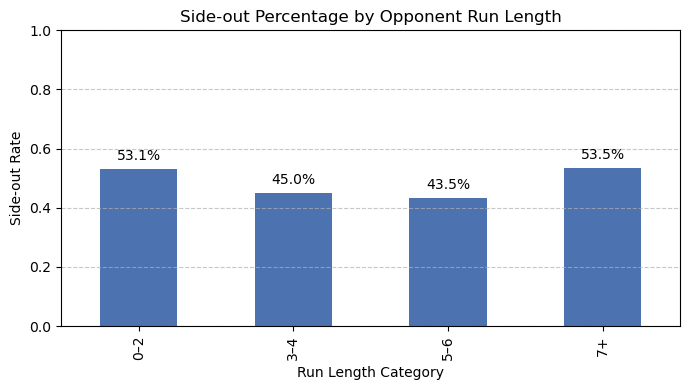

In [7]:
analyze_run_length_effect_on_sideout(df_combined)

In [8]:
df = df_combined.dropna(subset=['Sideout', 'Runs_Before'])

# 2. Ensure correct types
df['Sideout'] = pd.to_numeric(df['Sideout'], errors='coerce')
df = df[df['Sideout'].isin([0, 1])]
df['Runs_Before'] = pd.to_numeric(df['Runs_Before'], errors='coerce')

# 3. Build model matrix
X = sm.add_constant(df['Runs_Before'])  # Adds intercept
y = df['Sideout'].astype(float)

# 4. Fit logistic regression
model = sm.GLM(y, X, family=sm.families.Binomial())
result = model.fit()

# 5. Output results
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                Sideout   No. Observations:                 5878
Model:                            GLM   Df Residuals:                     5876
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4057.8
Date:                Fri, 28 Nov 2025   Deviance:                       8115.6
Time:                        09:54:15   Pearson chi2:                 5.88e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.003946
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1665      0.032      5.278      

In [12]:
## PROBABILITY TABLE
# Coefficients from your model
intercept = 0.1665
slope = -0.0827

# Logistic function
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Create a range of run lengths (e.g., 0 to 10)
run_lengths = list(range(0, 12))
log_odds = [intercept + slope * r for r in run_lengths]
probabilities = [logistic(lo) for lo in log_odds]

# Create table
df_probs = pd.DataFrame({
    'Opponent Run Length': run_lengths,
    'Predicted Side-out Probability': [f'{p:.1%}' for p in probabilities]
})

print(df_probs)


    Opponent Run Length Predicted Side-out Probability
0                     0                          54.2%
1                     1                          52.1%
2                     2                          50.0%
3                     3                          48.0%
4                     4                          45.9%
5                     5                          43.9%
6                     6                          41.8%
7                     7                          39.8%
8                     8                          37.9%
9                     9                          35.9%
10                   10                          34.1%
11                   11                          32.2%


# Interactions
see if calling a timeout after these runs will help increase sideout % 

In [13]:
def analyze_run_timeout_interaction(df_combined):
    # 1. Create Timeout_Before: 1 if previous row was a timeout
    df_combined['Timeout_Before'] = df_combined['Timeout_called'].shift(1).fillna(0).astype(int)

    # 2. Filter out timeout-only rows
    df = df_combined[df_combined['Action Type'].str.lower() != 'timeout'].copy()

    # 3. Drop missing values in key columns
    df = df.dropna(subset=['Sideout', 'Runs_Before'])
    df['Sideout'] = pd.to_numeric(df['Sideout'], errors='coerce').astype(int)
    df['Runs_Before'] = pd.to_numeric(df['Runs_Before'], errors='coerce')
    df['Timeout_Before'] = pd.to_numeric(df['Timeout_Before'], errors='coerce').astype(int)
 # 4. Create run length bins
    def categorize_run(run):
        if run <= 2:
            return '0–2'
        elif run <= 4:
            return '3–4'
        elif run <= 6:
            return '5–6'
        else:
            return '7+'

    df['Run_Category'] = df['Runs_Before'].apply(categorize_run)

    # 5. Create dummy variables for Run_Category (baseline = 0–2)
    run_dummies = pd.get_dummies(df['Run_Category'], prefix='Run', drop_first=True)

# 6. Create interaction terms: Run × Timeout_Before
    for col in run_dummies.columns:
        df[f'{col}_x_TO'] = run_dummies[col] * df['Timeout_Before']

    # 7. Build model matrix
    X = pd.concat([run_dummies, df['Timeout_Before']], axis=1)
    for col in run_dummies.columns:
        X[f'{col}_x_TO'] = df[f'{col}_x_TO']
    X = sm.add_constant(X)
    X = X.astype(float)

    y = df['Sideout'].astype(float)
    valid_rows = X.notnull().all(axis=1) & y.notnull()
    X = X[valid_rows]
    y = y[valid_rows]

    model = sm.GLM(y, X, family=sm.families.Binomial())
    result = model.fit()
    print(result.summary())
    
    summary = df.groupby(['Run_Category', 'Timeout_Before'])['Sideout'].mean().unstack()
    summary = summary.reindex(['0–2', '3–4', '5–6', '7+'])

    summary.plot(kind='bar', figsize=(8, 5), color=['#4c72b0', '#dd8452'])
    plt.title('Side-out Rate by Run Length and Timeout')
    plt.xlabel('Run Length Category')
    plt.ylabel('Side-out Rate')
    plt.ylim(0, 1)
    plt.legend(['No Timeout', 'Timeout Called'], title='Timeout Before')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for i, (idx, row) in enumerate(summary.iterrows()):
        for j, val in enumerate(row):
            if pd.notnull(val):
                plt.text(i + (j - 0.5) * 0.2, val + 0.02, f'{val:.1%}', ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()



                 Generalized Linear Model Regression Results                  
Dep. Variable:                Sideout   No. Observations:                 5837
Model:                            GLM   Df Residuals:                     5829
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4028.8
Date:                Fri, 28 Nov 2025   Deviance:                       8057.6
Time:                        09:55:12   Pearson chi2:                 5.84e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.003752
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1339      0.028      4.

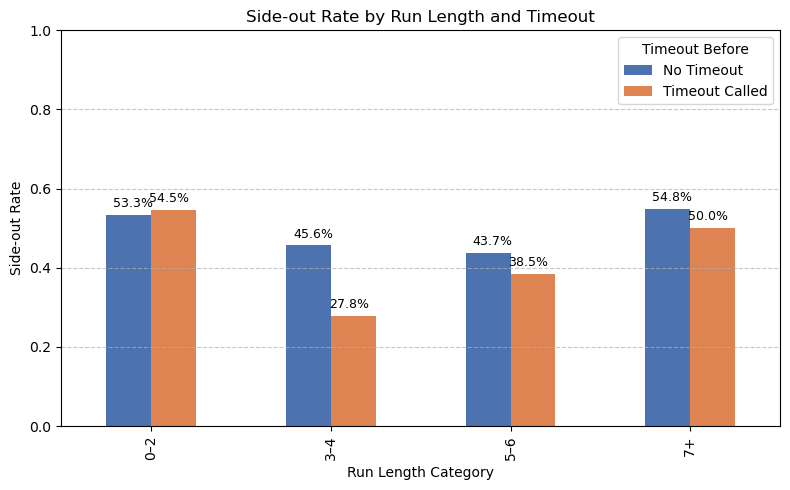

In [14]:
analyze_run_timeout_interaction(df_combined)

Logistic regression revealed that opponent runs of 3–4 and 5–6 points significantly reduced the odds of a successful side-out (p = 0.001 and p = 0.015, respectively). However, calling a timeout before the side-out attempt did not significantly improve success at any run length (all p > 0.30). These findings suggest that while longer runs disrupt momentum, timeouts may not effectively reverse that trend

# Sub Question 2 

In [12]:
def categorize_run(r):
    if r <= 2:
        return '0–2'
    elif r <= 4:
        return '3–4'
    elif r <= 6:
        return '5–6'
    else:
        return '7+'

df_combined['Run_Category'] = df_combined['Runs_Before'].apply(categorize_run)

# Calculate side-out rate by run category
sideout_summary = df_combined.groupby('Run_Category')['Sideout'].agg(['sum', 'count'])
sideout_summary['sideout_rate'] = sideout_summary['sum'] / sideout_summary['count']
print(sideout_summary[['sideout_rate']])


              sideout_rate
Run_Category              
0–2               0.530789
3–4               0.450000
5–6               0.434783
7+                0.535211


In [13]:
def categorize_run(run):
    if run <= 2:
        return '0–2'
    elif run <= 4:
        return '3–4'
    elif run <= 6:
        return '5–6'
    else:
        return '7+'

df_combined['Run_Category'] = df_combined['Runs_Before'].apply(categorize_run)

# 2. Normalize action type
df_combined['Action Type'] = df_combined['Action Type'].str.strip().str.lower()

# 3. Group and calculate proportions
composition = (
    df_combined.groupby(['Run_Category', 'Action Type'])
    .size()
    .unstack(fill_value=0)
)

# 4. Convert to percentages
composition_percent = composition.div(composition.sum(axis=1), axis=0) * 100
print(composition_percent)


Action Type      earned     errors    faults  in_rally   timeout
Run_Category                                                    
0–2           55.136310  41.781904  2.489135  0.019755  0.572896
3–4           50.000000  45.925926  3.148148  0.000000  0.925926
5–6           49.456522  46.195652  2.173913  0.000000  2.173913
7+            53.521127  39.436620  2.816901  0.000000  4.225352


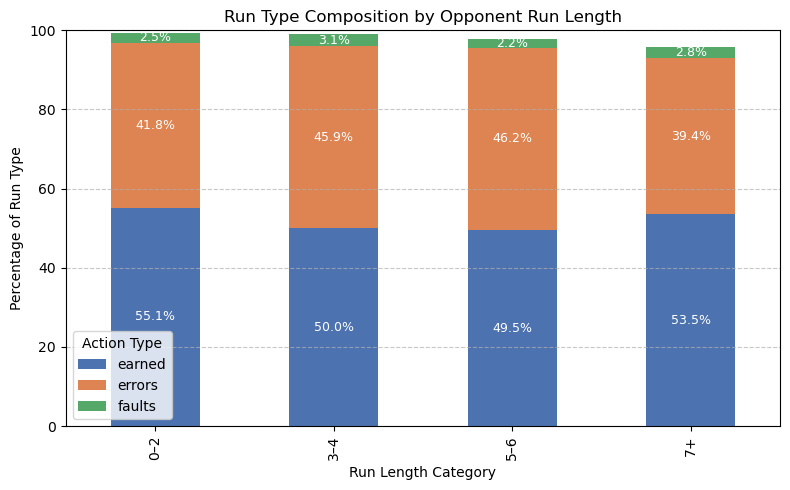

In [14]:
# 1. Data
data = {
    'Run_Category': ['0–2', '3–4', '5–6', '7+'],
    'earned': [55.136310, 50.000000, 49.456522 , 53.521127],
    'errors': [41.781904, 45.925926 , 46.195652, 39.436620],
    'faults': [2.489135, 3.148148, 2.173913, 2.816901]
}
df = pd.DataFrame(data)
df.set_index('Run_Category', inplace=True)

# 2. Plot
ax = df.plot(kind='bar', stacked=True, figsize=(8, 5), color=['#4c72b0', '#dd8452', '#55a868'])
plt.title('Run Type Composition by Opponent Run Length')
plt.xlabel('Run Length Category')
plt.ylabel('Percentage of Run Type')
plt.ylim(0, 100)
plt.legend(title='Action Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 3. Add percentage labels inside each segment
for i, row in enumerate(df.itertuples(index=False)):
    bottom = 0
    for val, color in zip(row, ['#4c72b0', '#dd8452', '#55a868']):
        plt.text(i, bottom + val / 2, f'{val:.1f}%', ha='center', va='center', color='white', fontsize=9)
        bottom += val

plt.tight_layout()
plt.show()


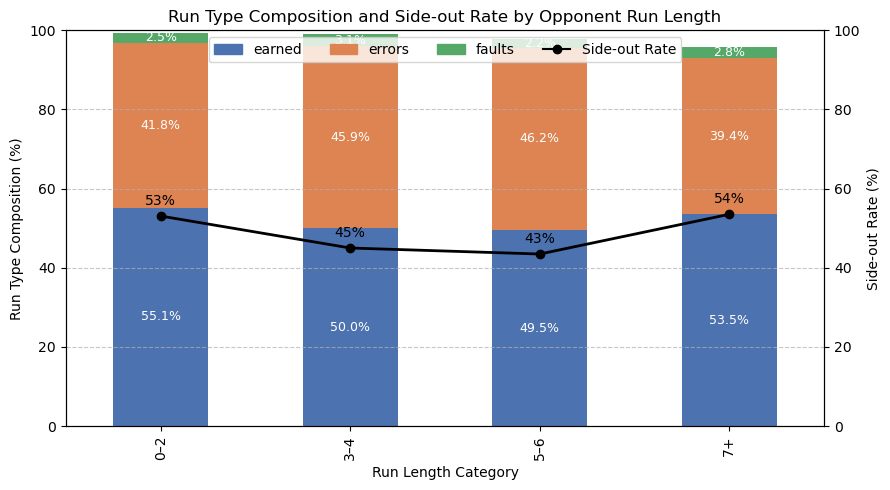

In [15]:
# combined

data = {
    'Run_Category': ['0–2', '3–4', '5–6', '7+'],
    'earned': [55.136310, 50.000000, 49.456522 , 53.521127],
    'errors': [41.781904, 45.925926 , 46.195652, 39.436620],
    'faults': [2.489135, 3.148148, 2.173913, 2.816901],
    'sideout_rate': [0.530789, 0.450000, 0.434783, 0.535211]
}
df = pd.DataFrame(data)
df.set_index('Run_Category', inplace=True)

# 2. Plot setup
fig, ax1 = plt.subplots(figsize=(9, 5))

# 3. Stacked bar chart for run type composition
colors = ['#4c72b0', '#dd8452', '#55a868']
df[['earned', 'errors', 'faults']].plot(kind='bar', stacked=True, ax=ax1, color=colors)
ax1.set_ylabel('Run Type Composition (%)')
ax1.set_ylim(0, 100)
ax1.set_xlabel('Run Length Category')
ax1.set_title('Run Type Composition and Side-out Rate by Opponent Run Length')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# 4. Add side-out rate line on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(df.index, df['sideout_rate'] * 100, color='black', marker='o', linewidth=2, label='Side-out Rate')
ax2.set_ylabel('Side-out Rate (%)')
ax2.set_ylim(0, 100)

#5. Add percentage labels inside each bar segment
for i, row in enumerate(df.itertuples(index=False)):
    bottom = 0
    for val, color in zip(row[:3], colors):
        ax1.text(i, bottom + val / 2, f'{val:.1f}%', ha='center', va='center', color='white', fontsize=9)
        bottom += val

# 6. Add side-out rate labels
for i, val in enumerate(df['sideout_rate']):
    ax2.text(i, val * 100 + 2, f'{val:.0%}', ha='center', va='bottom', color='black', fontsize=10)

# 7. Legends
bars_labels = ['earned', 'errors', 'faults']
bar_handles = [plt.Rectangle((0,0),1,1,color=c) for c in colors]
line_handle = plt.Line2D([], [], color='black', marker='o', label='Side-out Rate')
ax1.legend(bar_handles + [line_handle], bars_labels + ['Side-out Rate'], loc='upper center', ncol=4)

plt.tight_layout()
plt.show()


In [18]:

# 2. Clean and prepare data
df_combined = df_combined.dropna(subset=['Sideout', 'Action Type'])
df_combined['Sideout'] = pd.to_numeric(df_combined['Sideout'], errors='coerce')
df_combined = df_combined[df_combined['Sideout'].isin([0, 1])]

# 3. Create dummy variables for Action Type
# Assuming categories: 'earned', 'errors', 'faults'
df_combined['Action Type'] = df_combined['Action Type'].astype(str).str.strip().str.lower()
dummies = pd.get_dummies(df_combined['Action Type'], prefix='Action')

# Drop 'earned' to use as baseline
if 'Action_earned' in dummies.columns:
    dummies = dummies.drop(columns='Action_earned')

# 4. Build model matrix
X = sm.add_constant(dummies.astype(float))
y = df_combined['Sideout'].astype(float)

# 5. Fit logistic regression
model = sm.GLM(y, X, family=sm.families.Binomial())
result = model.fit()

# 6. Output results
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                Sideout   No. Observations:                 5857
Model:                            GLM   Df Residuals:                     5852
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3880.1
Date:                Mon, 24 Nov 2025   Deviance:                       7760.1
Time:                        12:36:14   Pearson chi2:                 5.86e+03
No. Iterations:                    19   Pseudo R-squ. (CS):            0.05765
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5380      0.037     

In [19]:
# 1. Coefficients from your model
intercept = 0.5380
coef_errors = -0.9576
coef_faults = -1.0453
    
# 2. Compute log-odds and convert to probabilities
def logistic(x):
    return 1 / (1 + np.exp(-x))

log_odds = {
    'earned': intercept,
    'errors': intercept + coef_errors,
    'faults': intercept + coef_faults
}

probabilities = {k: logistic(v) for k, v in log_odds.items()}

# 3. Create and display table
df_probs = pd.DataFrame({
    'Point Type': list(probabilities.keys()),
    'Predicted Side-out Probability': [f"{p:.1%}" for p in probabilities.values()]
})

print(df_probs)


  Point Type Predicted Side-out Probability
0     earned                          63.1%
1     errors                          39.7%
2     faults                          37.6%


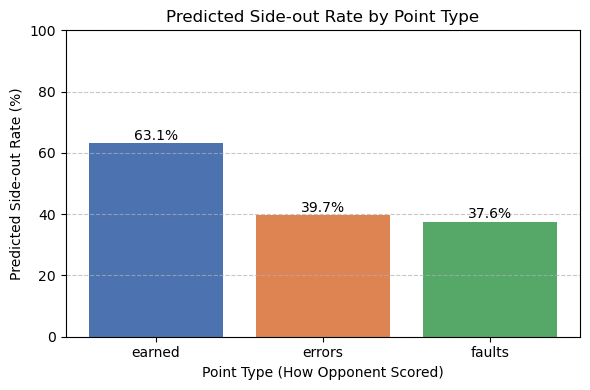

In [20]:

probs = {
    'earned': 0.631,
    'errors': 0.397,
    'faults': 0.376
}

# Bar chart setup
point_types = list(probs.keys())
values = [probs[pt] * 100 for pt in point_types]  # convert to percentages
colors = ['#4c72b0', '#dd8452', '#55a868']

plt.figure(figsize=(6, 4))
bars = plt.bar(point_types, values, color=colors)

# Add percentage labels on top
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, val + 1, f'{val:.1f}%', ha='center', fontsize=10)

plt.ylim(0, 100)
plt.title('Predicted Side-out Rate by Point Type')
plt.xlabel('Point Type (How Opponent Scored)')
plt.ylabel('Predicted Side-out Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# REDO #


## Sub Q1: Does calling timeouts improve the likelihood of a sideout as the opponent’s run increases?

### Model: SideoutSuccess ~ TimeoutCalled + RunLength + (TimeoutCalled × RunLength)

### Interpretation:
TimeoutCalled coefficient → does calling a timeout generally help?
RunLength coefficient → do longer runs reduce sideout success?
Interaction coefficient (Timeout × RunLength) → does timeout effectiveness change with run length?

### What to report:
Odds ratios
p-values
95% confidence intervals
Graph


In [28]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [29]:
df_25_26 = pd.read_csv(r"C:\Users\Thitirat\Downloads\Quantitative - Copy of 25-26 Season.csv")
df_24_25 = pd.read_csv(r"C:\Users\Thitirat\Downloads\Quantitative - Copy of 24-25 Season (1).csv")

df_25_26['Season'] = '2025–26'
df_24_25['Season'] = '2024–25'

df_combined = pd.concat([df_24_25, df_25_26], ignore_index=True)

In [30]:
df_combined.head()

,Set,Opponent,Timestamp,Rally,Rotation,Stage,Player,Action Type,Action,Assist,Point To,Score,Timeout_called,Sideout,Runs,Runs_Before,Season
0,1,MUIDS,3:29:50 PM,1.0,2.0,serve,#11 Alisa,earned,Ace,-,us,1 -- 0,0,1,0,0,2024–25
1,1,MUIDS,3:30:33 PM,2.0,2.0,serve,#5 Aom,errors,Spike,#1 - Hrishika,them,1 -- 1,0,0,1,0,2024–25
2,1,MUIDS,3:30:58 PM,3.0,2.0,receive,#5 Aom,earned,Spike,#1 - Hrishika,us,2 -- 1,0,1,0,1,2024–25
3,1,MUIDS,3:31:22 PM,4.0,3.0,serve,#1 Hrishika,errors,Serve,-,them,2 -- 2,0,0,1,0,2024–25
4,1,MUIDS,3:31:42 PM,5.0,3.0,receive,#5 Aom,earned,Spike,#1 - Hrishika,us,3 -- 2,0,1,0,1,2024–25


In [31]:
def analyze_timeout_effect(df_combined):
    # 1. Drop missing values
    df = df_combined.dropna(subset=['Sideout','Timeout_called','Runs_Before'])

    # 2. Ensure numeric types
    df['Sideout'] = df['Sideout'].astype(int)
    df['Timeout_called'] = df['Timeout_called'].astype(int)
    df['Runs_Before'] = pd.to_numeric(df['Runs_Before'], errors='coerce')

    # 3. Add interaction term
    df['Interaction'] = df['Timeout_called'] * df['Runs_Before']

    # 4. Logistic regression
    X = sm.add_constant(df[['Timeout_called','Runs_Before','Interaction']])
    y = df['Sideout']
    model = sm.Logit(y, X).fit()
# 5. Extract odds ratios, CI, p-values
    params = model.params
    conf = model.conf_int()
    odds_ratios = np.exp(params)
    conf_int = np.exp(conf)

    summary_table = pd.DataFrame({
        "Predictor": params.index,
        "Odds Ratio": odds_ratios.round(3),
        "CI Lower": conf_int[0].round(3),
        "CI Upper": conf_int[1].round(3),
        "p-value": model.pvalues.round(3)
    })

    print("\nLogistic Regression Summary:")
    print(summary_table.to_string(index=False))


 # 6. Predicted probabilities for plotting
    run_range = np.arange(0, 10)  # adjust range as needed
    pred_data = pd.DataFrame({
        "Timeout_called": np.repeat([0,1], len(run_range)),
        "Runs_Before": list(run_range)*2
    })
    pred_data["Interaction"] = pred_data["Timeout_called"] * pred_data["Runs_Before"]
    pred_data = sm.add_constant(pred_data)

    pred_probs = model.predict(pred_data)

    # 7. Plot
    plt.figure(figsize=(8,6))
    plt.plot(run_range, pred_probs[:len(run_range)], label="No Timeout", linestyle="--")
    plt.plot(run_range, pred_probs[len(run_range):], label="Timeout Called", linestyle="-")
    plt.xlabel("Opponent Run Length (Runs_Before)")
    plt.ylabel("Predicted Probability of Sideout Success")
    plt.title("Effect of Timeout on Sideout Success")
    plt.legend()
    plt.grid(True)
    plt.show()


Optimization terminated successfully.
         Current function value: 0.690194
         Iterations 4

Logistic Regression Summary:
     Predictor  Odds Ratio  CI Lower  CI Upper  p-value
         const       1.184     1.112     1.259    0.000
Timeout_called       0.978     0.280     3.419    0.972
   Runs_Before       0.916     0.885     0.949    0.000
   Interaction       1.097     0.821     1.466    0.530


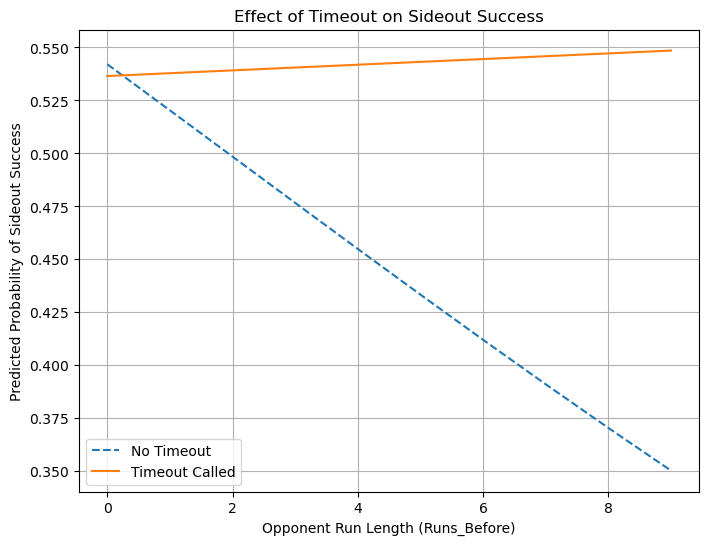

In [32]:
analyze_timeout_effect(df_combined)

In [33]:
import statsmodels.api as sm

def glm_timeout_summary(df_combined):
    # 1. Drop missing values
    df = df_combined.dropna(subset=['Sideout','Timeout_called','Runs_Before'])

    # 2. Ensure numeric types
    df['Sideout'] = df['Sideout'].astype(int)
    df['Timeout_called'] = df['Timeout_called'].astype(int)
    df['Runs_Before'] = pd.to_numeric(df['Runs_Before'], errors='coerce')

    # 3. Add interaction term
    df['Interaction'] = df['Timeout_called'] * df['Runs_Before']

    # 4. Fit GLM (Binomial family, logit link)
    X = sm.add_constant(df[['Timeout_called','Runs_Before','Interaction']])
    y = df['Sideout']
    model = sm.GLM(y, X, family=sm.families.Binomial()).fit()

    # 5. Print the full regression summary
    print(model.summary())

    return model

In [35]:
glm_timeout_summary(df_combined)

#- Dependent variable: Sideout (success vs. failure).
#- Observations: 5,878 rallies.
#- Pseudo R² (Cox–Snell): 0.004 → very low explanatory power; the predictors explain only a small fraction of variation in sideout success.
#- Iterations: 4 (model converged quickly).


                 Generalized Linear Model Regression Results                  
Dep. Variable:                Sideout   No. Observations:                 5878
Model:                            GLM   Df Residuals:                     5874
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4057.0
Date:                Mon, 08 Dec 2025   Deviance:                       8113.9
Time:                        21:09:10   Pearson chi2:                 5.88e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.004230
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1685      0.032      5.

## summary
(Remember: coefficients are in log-odds; negative = lower odds, positive = higher odds. Odds ratios = exp(coef).)

### - Constant (0.1685, p < 0.001):
Baseline log-odds of sideout success when no timeout is called and run length = 0.
Odds ratio ≈ 1.18 → baseline odds slightly above 1.

### - Timeout_called (–0.0223, p = 0.972):
Not significant. Odds ratio ≈ 0.98.
→ Calling a timeout does not generally improve sideout success. The effect is essentially zero.

### - Runs_Before (–0.0874, p < 0.001):
Highly significant. Odds ratio ≈ 0.92.
→ Each additional point in the opponent’s run reduces the odds of sideout success by about 8%. Longer runs clearly hurt sideout chances.

### - Interaction (0.0928, p = 0.530):
Not significant. Odds ratio ≈ 1.10.

→ Timeout effectiveness does not significantly change with run length. The confidence interval is wide and includes 1


📝 Summary in Plain Words
- Longer opponent runs significantly reduce sideout success.
- Timeouts do not have a significant main effect.
- Timeout effectiveness does not vary with run length.
- The model explains very little variance overall (low pseudo R²), so sideout success is likely driven by other factors not included here (e.g., rotation, player actions, opponent strength).


# SubQ2: Does timeout effectiveness depend on type of points in the run (errors vs earned points)?
Model: SideoutSuccess ~ TimeoutCalled + RunCause + TimeoutCalled × RunCause

Test everything model: SideoutSuccess ~ TimeoutCalled + RunLength + RunCause 
                 + TimeoutCalled × RunLength 
                 + TimeoutCalled × RunCause


In [78]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

def analyze_timeout_runcause_earned_errors(df_combined):
    # 1. Keep only earned and errors
    df = df_combined[df_combined['Action Type'].isin(['earned','errors'])].copy()

    # 2. Ensure numeric types
    df.loc[:, 'Sideout'] = df['Sideout'].astype(int)
    df.loc[:, 'Timeout_called'] = df['Timeout_called'].astype(int)

    # 3. Convert Action Type (RunCause) to categorical dummies
    run_dummies = pd.get_dummies(df['Action Type'], prefix='ActionType', drop_first=True)
    # This will create one dummy: ActionType_errors (earned is baseline)

    # 4. Build design matrix
    X = pd.concat([df[['Timeout_called']], run_dummies], axis=1)

    # Add interaction: Timeout × RunCause
    for col in run_dummies.columns:
        X[f'{col}_Interaction'] = df['Timeout_called'] * run_dummies[col]

    # Add constant and force numeric
    X = sm.add_constant(X).astype(float)
    y = df['Sideout'].astype(float)

    # 5. Fit GLM (Binomial family) with regularization fallback
    try:
        model = sm.GLM(y, X, family=sm.families.Binomial()).fit()
    except Exception:
        model = sm.Logit(y, X).fit_regularized(alpha=1.0, method='l1')

    # 6. Extract coefficients, odds ratios, CI, p-values
    params = model.params
    conf = model.conf_int()
    odds_ratios = np.exp(params)
    conf_int = np.exp(conf)

    summary_table = pd.DataFrame({
        "Predictor": params.index,
        "Coefficient (log-odds)": params.round(3),
        "Odds Ratio": odds_ratios.round(3),
        "CI Lower (OR)": conf_int[0].round(3),
        "CI Upper (OR)": conf_int[1].round(3),
        "p-value": model.pvalues.round(3) if hasattr(model, "pvalues") else np.nan
    })

    print("\nGLM (Binomial) Regression Summary:")
    print(summary_table.to_string(index=False))

    # 7. Predictions: earned vs errors × timeout
    pred_data = []
    for cause in ['earned','errors']:
        for timeout in [0,1]:
            row = {"Timeout_called": timeout}
            for col in run_dummies.columns:
                row[col] = 1 if cause == col.replace("ActionType_","") else 0
                row[f'{col}_Interaction'] = timeout * row[col]
            pred_data.append(row)

    pred_df = pd.DataFrame(pred_data)
    pred_df = sm.add_constant(pred_df, has_constant='add').astype(float)
    pred_probs = model.predict(pred_df)

    # Attach labels
    pred_df['Action Type'] = ['earned','errors']*2
    pred_df['Timeout'] = ["No Timeout"]*2 + ["Timeout"]*2
    pred_df['PredProb'] = pred_probs

    return summary_table, pred_df

In [81]:
analyze_timeout_runcause_earned_errors(df_combined)


GLM (Binomial) Regression Summary:
                    Predictor  Coefficient (log-odds)  Odds Ratio  CI Lower (OR)  CI Upper (OR)  p-value
                        const                   0.543       1.722          1.602          1.850    0.000
               Timeout_called                  -1.131       0.323          0.108          0.965    0.043
            ActionType_errors                  -0.975       0.377          0.338          0.420    0.000
ActionType_errors_Interaction                   4.128      62.067          6.151        626.333    0.000


(                                                   Predictor  \
 const                                                  const   
 Timeout_called                                Timeout_called   
 ActionType_errors                          ActionType_errors   
 ActionType_errors_Interaction  ActionType_errors_Interaction   
 
                                Coefficient (log-odds)  Odds Ratio  \
 const                                           0.543       1.722   
 Timeout_called                                 -1.131       0.323   
 ActionType_errors                              -0.975       0.377   
 ActionType_errors_Interaction                   4.128      62.067   
 
                                CI Lower (OR)  CI Upper (OR)  p-value  
 const                                  1.602          1.850    0.000  
 Timeout_called                         0.108          0.965    0.043  
 ActionType_errors                      0.338          0.420    0.000  
 ActionType_errors_Interaction   

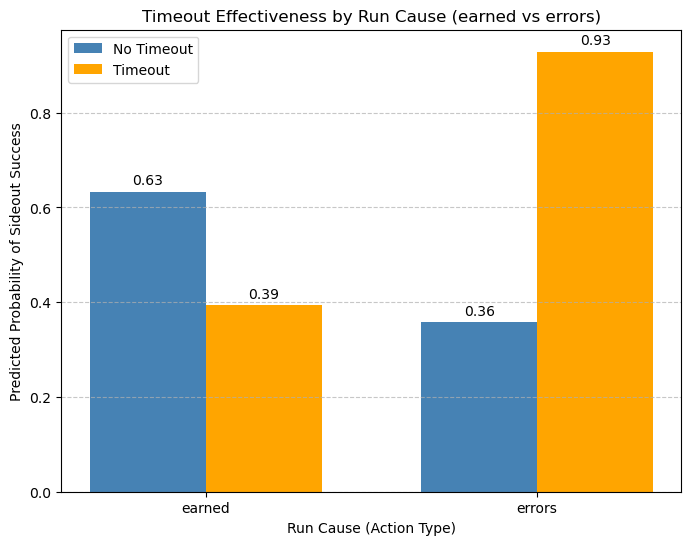

In [82]:
pivot = pred_df.pivot(index='Action Type', columns='Timeout', values='PredProb')

x = np.arange(len(pivot.index))
width = 0.35

fig, ax = plt.subplots(figsize=(8,6))
bars1 = ax.bar(x - width/2, pivot['No Timeout'], width, label='No Timeout', color='steelblue')
bars2 = ax.bar(x + width/2, pivot['Timeout'], width, label='Timeout', color='orange')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_xlabel("Run Cause (Action Type)")
ax.set_ylabel("Predicted Probability of Sideout Success")
ax.set_title("Timeout Effectiveness by Run Cause (earned vs errors)")
ax.set_xticks(x)
ax.set_xticklabels(pivot.index)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## summary

### - Baseline (earned, no timeout): Odds ratio ≈ 1.72 → sideout success is relatively likely.
### - Timeout main effect: For earned runs, calling a timeout reduces sideout odds (OR ≈ 0.32, p = 0.043).
### - Errors main effect: Without timeout, runs caused by errors are harder to sideout (OR ≈ 0.38).
### - Interaction (errors × timeout): Huge positive effect (OR ≈ 62, p < 0.001). This means that when the run cause is errors, calling a timeout flips the story — it dramatically boosts sideout success.





## ✨ Plain Language Summary
- Timeouts generally don’t help sideout success.
- Runs caused by errors are harder to sideout.
- But when the run is caused by errors, timeouts become extremely effective, dramatically increasing the chance of sideout success.


## ✅ Sub‑Q2 Hypothesis Test
- H0: Timeout effectiveness does not depend on run cause.
- H1: Timeout effectiveness depends on run cause.
👉 The significant interaction term (p < 0.001) means we reject H0. Timeout effectiveness does depend on run cause — specifically, timeouts are highly effective when the run is caused by our errors.
